# **Knowledge Base Creation**

***Imports***

In [ ]:
import requests
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import urllib.parse
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import json
from google.colab import drive

### ***ETHNIC GROUPS***






---



**LGBTQI+**

**Women & Girls**

**black or African American**

**Hispanic & Latino**

**Asian**

**Muslim**

**Arabs**

**Jewish**

**Migrants & Rrfugee**

**Mediterranean**

**Other** 





---







**Helper functions**

In [ ]:
def create_word_cloud(target_key):
  unique_string=(" ").join(targets_to_terms[target_key])
  wordcloud = WordCloud(width = 400, height = 400, background_color="white",
                max_words=5000, contour_width=2, contour_color='black').generate(unique_string)
  plt.figure(figsize=(15,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.savefig("your_file_name"+".png", bbox_inches='tight')
  plt.show()
  plt.close()


def create_pie_plt(terms, data):
  # Creating plot
  fig = plt.figure(figsize =(10, 7))

  def my_autopct(pct):
    return str(pct)
  plt.pie(data, labels = terms, autopct=my_autopct)
  
  # show plot
  plt.show()

## **Wikepedia Ethnic Slurs List Data Extraction**

---






In [ ]:
all_records = []
term_fields = ["term", "origin", "targets", "meaning", "refrences"]
page = requests.get("https://en.wikipedia.org/wiki/List_of_ethnic_slurs")
 
# scrape webpage
soup = BeautifulSoup(page.content, 'html.parser')
# create object
results = soup.find(id="mw-content-text")
# find tags
#items = results.find_all(class_="wikitable")
table_elements = results.find_all("table", class_="wikitable")

for table in table_elements:
  body = table.find("tbody")
  tr_objects = table.find_all("tr")
  for tr in tr_objects:
    elements = tr.find_all("td")
    if len(elements) != 5:
      continue
    fields_values = []
    for field in elements:
      fields_values.append(field.text.lower().strip().replace('\n',''))
    all_records.append(dict(zip(term_fields, fields_values)))

In [ ]:
origins = set([x['origin'] for x in all_records])
terms = set([x['term'] for x in all_records if 'united states' in x['origin']])
targets = set([x['targets'] for x in all_records if 'united states' in x['origin']])

**Take US origin**

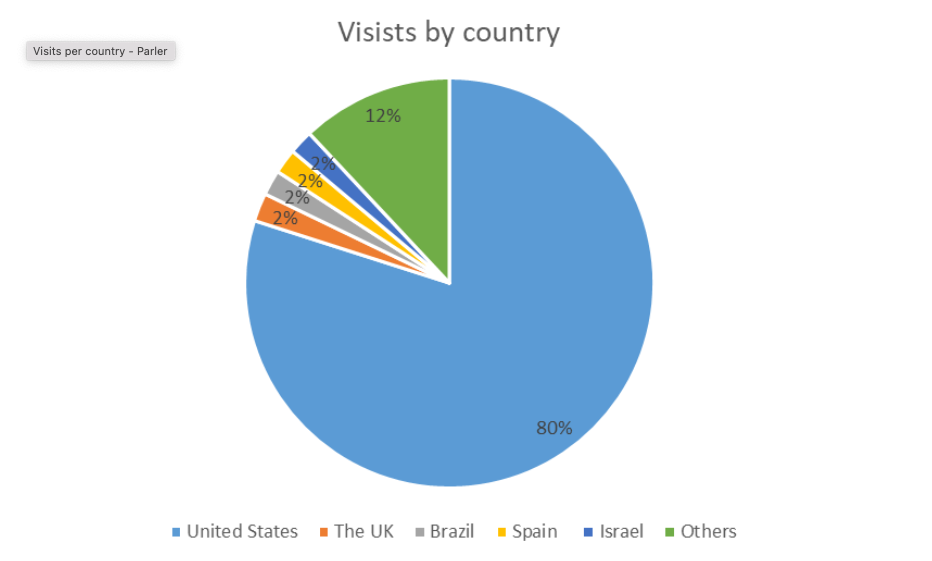

**Extract key-words for each target-group from Wikepedia Ethnic Slurs List manually**

In [ ]:
lgbtqi_keywords = []
migra_rfug_keywords = ['foreign']
women_keywords = []
black_keywords = ['african', 'afrikan', 'black', 'dark']
hisp_lat_keywords = ['hispanic', 'latino', 'mexican']
asian_keywords = ['asian', 'chinese', 'filipino', 'indian', 'japanese', 'vietnamese']
muslim_keywords = []
arabs_keywords = ['arab', 'iraqi', 'afghans']
jewish_keywords = ['jewish']
mediterranean = ['mediterranean', 'italian']

***map each target-group to its keywords list***

In [ ]:
target_to_keywords = {
                      "LGBTQI+" : lgbtqi_keywords,    
                      "Women&Girls" : women_keywords,
                      "black&African_American": black_keywords,
                      "Hispanic_Latino": hisp_lat_keywords,
                      "Asian" : asian_keywords,
                      "Muslim" : muslim_keywords,
                      "Arabs": arabs_keywords,
                      "Jewish": jewish_keywords,
                      "Migrants&Rrfugee" : migra_rfug_keywords,
                      "Mediterranean": mediterranean
                     }

def process_terms(term):
  term = term.replace(' or ', ',')
  term = term.replace('.', '')
  if ':' in term:
    term = term.split(':')[0]
  if '/' in term:
    term = term.split('/')
  if ',' in term:
    term = term.split(',')
  if isinstance(term, list):
    term = list(map(lambda x: x.strip(), term))
    return term
  
  return term.strip()

*Based on the extracted key-words, collect all the ethnic slurs of each group*

In [ ]:
targets_to_terms = {k: [] for k in target_to_keywords.keys()}

all_records = [{k:v for k,v in x.items() if k in ['targets', 'term'] and 'united states' in x['origin']} for x in all_records]
all_records = [dct for dct in all_records if dct]
all_records = [dct for dct in all_records if dct['term']]

for k,v in targets_to_terms.items():
  for rec in all_records:
    if any(keyword in rec['targets'] for keyword in target_to_keywords[k]):
      term = process_terms(rec['term'])
      if term:
        targets_to_terms[k].extend(term if isinstance(term, list) else [term])

targets_to_terms["black&African_American"].append("black")

**Generate clouds of words**

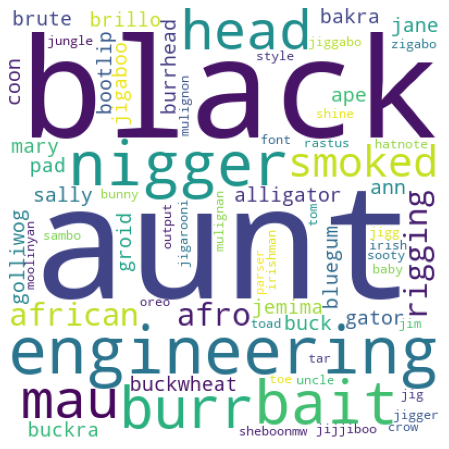

In [ ]:
create_word_cloud("black&African_American")

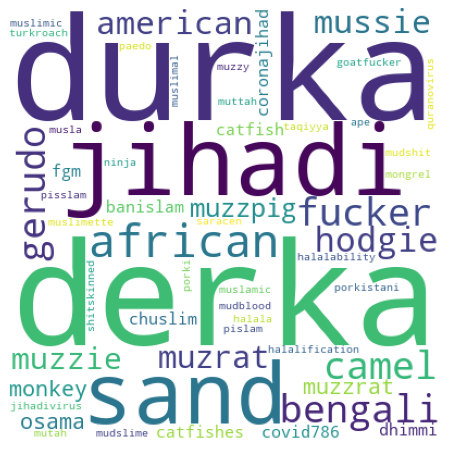

In [ ]:
create_word_cloud("Muslim")

## **Manuall Extraction From HATEBASE**

---







In [ ]:
base_url = "https://hatebase.org/search_results/"

In [ ]:
def get_terms(url, pages):
  terms = []
  for page in range(pages):
    p_url = f"{url}Cpage={page+1}"
    page = requests.get(p_url)
    # scrape webpage
    soup = BeautifulSoup(page.content, 'html.parser')
    # create object
    results = soup.find_all("tr")
    for tr in results:
      elements = tr.find_all("td")[:2]
      if len(elements) < 2:
        continue
      else:
        term = elements[0].text.replace('\n', '').split('(')[0].strip().lower()
        lang = elements[1].text
        if 'English' in lang:
          terms.append(term)
  return terms

In [ ]:
lgbtqi_hatebase_terms = []
migra_rfug_hatebase_terms = []
women_hatebase_terms = []
black_hatebase_terms = []
hisp_lat_hatebase_terms = []
asian_hatebase_terms = []
muslim_hatebase_terms = []
arabs_hatebase_terms = []
jewish_hatebase_terms = []
mediterranean_hatebase_terms = []

**HATEBASE API is depricated -> all the urls are hardcoded**

In [ ]:
#LQBTQI
lgbtqi_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"orientation_id=3%7"), 7)
lgbtqi_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"gender_id%3D14"), 1))
#WOMAN
women_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"gender_id=6%7"), 10)
#BLACK & AFRO AMERICAN
black_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"ethnicity_id=5%7"), 2)
#HISPANIC & LATINO
hisp_lat_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"ethnicity_id%3D303"), 1)
hisp_lat_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DCU"), 1))
hisp_lat_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DMX"), 1))
hisp_lat_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DMX"), 1))
#ASIAN
asian_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"country_id=CN%7"), 2)
asian_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DVN"), 1))
asian_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DJP"), 1))
asian_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DIN"), 1))
#MUSLIM
muslim_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"religion_id=11%7"), 5)
#ARAB
arabs_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"country_id%3DEG"), 1)
arabs_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DLB"), 1))
arabs_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DSO"), 1))
#JEWISH
jewish_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"religion_id=14Cpage%7"), 2)
#MEDITERRANEAN
mediterranean_hatebase_terms = get_terms(urllib.parse.urljoin(base_url,"country_id%3DES"), 1)
mediterranean_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DIT"), 1))
mediterranean_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DHR"), 1))
mediterranean_hatebase_terms.extend(get_terms(urllib.parse.urljoin(base_url,"country_id%3DAL"), 1))


In [ ]:
targets_to_hatebase_terms = {
                      "LGBTQI+" : lgbtqi_hatebase_terms,    
                      "Women&Girls" : women_hatebase_terms,
                      "black&African_American": black_hatebase_terms,
                      "Hispanic_Latino": hisp_lat_hatebase_terms,
                      "Asian" : asian_hatebase_terms,
                      "Muslim" : muslim_hatebase_terms,
                      "Arabs": arabs_hatebase_terms,
                      "Jewish": jewish_hatebase_terms,
                      "Mediterranean": mediterranean_hatebase_terms
                     }

## **merge HATEBASE and Widipedia data**

---







In [ ]:
for k in targets_to_terms.keys():
  if k in targets_to_hatebase_terms:
    targets_to_terms[k].extend(targets_to_hatebase_terms[k])

In [ ]:
targets_to_terms

{'LGBTQI+': ['batiman',
  'batimen',
  'batty boy',
  'batty boys',
  'batty bwoy',
  'batty bwoys',
  'batty man',
  'batty men',
  'battyman',
  'battymen',
  'bull dyke',
  'bull dykes',
  'butt pirate',
  'butt pirates',
  'chi chi bwoy',
  'chi chi bwoys',
  'chi chi man',
  'chi chi men',
  'closet dyke',
  'closet dykes',
  'closet fag',
  'closet fags',
  'closetfag',
  'closetfags',
  'cocksucker',
  'cocksuckers',
  'dyke',
  'dykes',
  'fag',
  'fagbag',
  'fagbags',
  'fagdick',
  'fagdicks',
  'faggot',
  'faggots',
  'faggy',
  'fags',
  'fagshit',
  'fagshits',
  'fairies',
  'fairy',
  'fruit',
  'fruities',
  'fruits',
  'fruity',
  'fudgepacker',
  'fudgepackers',
  'gay',
  'gay mafia',
  'gaylord',
  'gaylords',
  'gey',
  'ghey',
  'gheys',
  'homintern',
  'lavender mafia',
  'lipstick lesbian',
  'lipstick lesbians',
  'lobby gay',
  'niggerfag',
  'queen',
  'queens',
  'queer',
  'queers',
  'shemale',
  'shemales',
  'tranny',
  'velvet mafia',
  'gender nigge

In [ ]:
# no results for this target-group
targets_to_terms.pop("Migrants&Rrfugee")

***Get slurs count for each group for statistics***

In [ ]:
targets_to_terms_counter = {k: len(v) for k,v in targets_to_terms.items()}

***Remove terms that causes to FL***

In [ ]:
# term to remove -> prevent FP
to_remove = {
              "LGBTQI+" : ['fruit', 'fruits', 'queen', 'queens'],    
              "Women&Girls" : [ 'bird', 'birds', 'fgm', 'girl', 'ho', 'ann', 'shine', 'bitch', 'bitches', 'hoe', 'hos'],
              "black&African_American": ['ann'],
              "Hispanic_Latino": [],
              "Asian" : ['coconut', 'flip', 'abc', 'fgm'],
              "Muslim" : [],
              "Arabs": ['nigger'],
              "Jewish": [],
              "Mediterranean": []
          }

for target, terms in targets_to_terms.items():
  term_to_remove = to_remove[target]
  for t in term_to_remove:
    if t in targets_to_terms[target]:
      targets_to_terms[target].remove(t)

***Save target groups to terms mapping***

In [ ]:
json_string = json.dumps(targets_to_terms)
with open("", "w") as f:
  f.write(json_string)

## **DATA ANNOTATION & STATISTICS**

---






In [ ]:
drive.mount('/content/gdrive', force_remount=True)
parler_data_path = '/NLP/parler_annotated_data_with_uids.csv' 
df = pd.read_csv(parler_data_path)

Mounted at /content/gdrive


In [ ]:
df

,id,text,label_mean,disputable_post,creator_id
0,a113a2d777ca4211ae97a193eee44dc1,Black men are taught that a word justifies all...,3.60,True,8bfa9319b5c84752a52da71124fa82d1
1,bb348c5f20a84be1bc3467d32312341c,Biden and his supporters are claiming that Bid...,4.00,True,1eb17cf953c34acda4e0cb6bd19edcec
2,39df38e04a44423f93ba1d1dc79070c9,Pelosi; âOne way or another Joe Biden will b...,1.25,False,94fd176e0481452f9ef84a71eff6631c
3,68dd325894274be79f73767e92e64702,Northern California Declares Independence From...,3.00,True,8a2da4cf07f84a17a015929a63f50e04
4,9503e349140b4bbe9e496f4c0f15f830,Whistleblower claims top DHS officials sought ...,1.50,False,1ada3334ad9449cf97c7a077eb9296de
...,...,...,...,...,...
10116,bd2e05ec9a7942b78fbedab3d75d1079,Minneapolis City Council Votes To Eliminate Po...,1.00,False,99526563c1ad4c11a6378fca0d1552df
10117,23ce3d9f0f09448abe4665b93dab2aef,And just like that facebook is gone,1.00,False,71e445d1f7424a8ab4d6987b2f84b7f0
10118,163f0fad195c4cb58ef31920921a1ab9,Obama Says He Will Campaign For Biden If He Ca...,1.00,False,30b29376587d4038ba057287275be658
10119,ca70cdcc29084720990fc21ca6a3e31d,Shoup Voting Machine,1.00,False,a8f671d028ae49feb7fb5232ddbc3de4


***Process data***

In [ ]:
def clean_text(x):
  try:
    x = x.replace('\n','').lower().strip()
    return x.encode('latin1').decode('unicode-escape').encode('latin1').decode('utf8') 
  except Exception:
    return x

for k,v in targets_to_terms.items():
  for term in v:
    if term == '' or not term:
      targets_to_terms[k].remove(term)

***Count number of texts for each target group***

In [ ]:
df['text'] = df['text'].apply(lambda x: clean_text(x))
groups_counts = {x: 0 for x in targets_to_terms}
groups_comments_ids = {x: set() for x in targets_to_terms}

def in_text(term, text):
  if len(term.split(' '))>1:
    return sent_in_text(term, text)
  else:
    return word_in_text(term, text)

def word_in_text(term, text):
  text = text.split(' ')
  return term in text

def sent_in_text(term, text):
  return term in text
  

for index, row in df.iterrows():
  for k, terms in targets_to_terms.items():
    for t in terms:
      if in_text(t, row['text']):
        groups_counts[k]+=1
        groups_comments_ids[k].add(row['id'])
        break

### **Terms count for each target group**

In [ ]:
groups_counts

{'LGBTQI+': 74,
 'Women&Girls': 124,
 'black&African_American': 392,
 'Hispanic_Latino': 0,
 'Asian': 9,
 'Muslim': 6,
 'Arabs': 0,
 'Jewish': 42,
 'Mediterranean': 2}

***Collect data for visualization***

In [ ]:
hispanic_latino_words_counts = {x:0 for x in targets_to_terms['Hispanic_Latino']}
for index, row in df.iterrows():
  for x in targets_to_terms['Hispanic_Latino']:
    if x in row['text']:
      hispanic_latino_words_counts[x]+=1

black_african_words_counts = {x:0 for x in targets_to_terms['black&African_American']}
for index, row in df.iterrows():
  for x in targets_to_terms['black&African_American']:
    if x != '' and x in row['text']:
      black_african_words_counts[x]+=1

In [ ]:
hispanic_latino_words_counts = {k: v for k, v in sorted(hispanic_latino_words_counts.items(), key=lambda item: item[1], reverse=True) if v}
black_african_words_counts = {k: v for k, v in sorted(black_african_words_counts.items(), key=lambda item: item[1], reverse=True) if v}

## **SHOW STATISTICS**

---



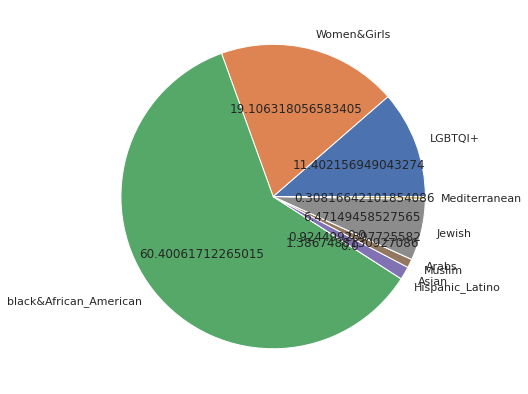

In [ ]:
create_pie_plt(groups_counts.keys(), groups_counts.values())

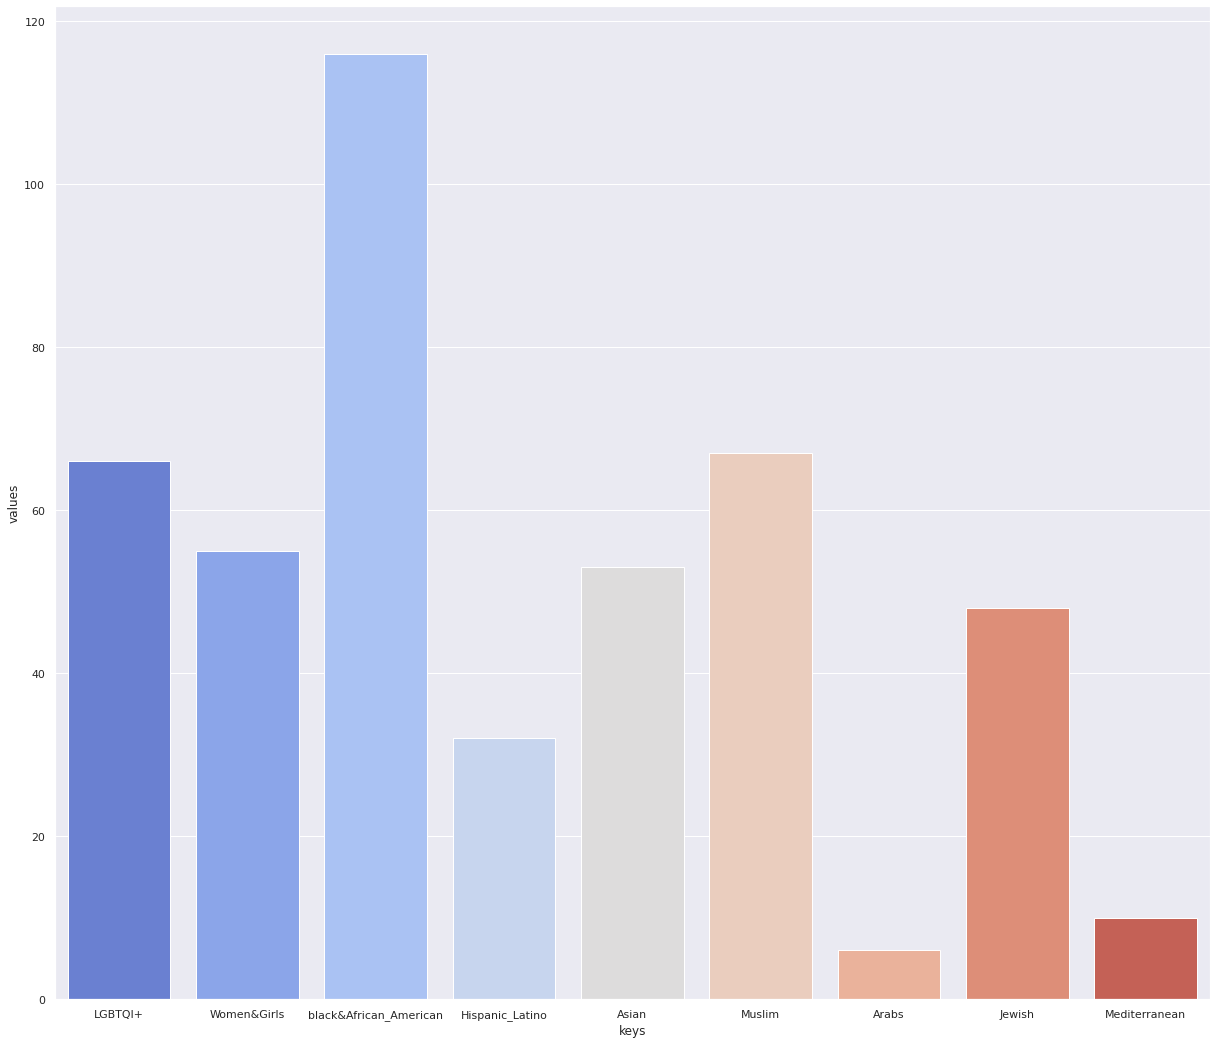

In [ ]:
palette = sns.color_palette("coolwarm", len(targets_to_terms_counter))
df = pd.DataFrame(list(targets_to_terms_counter.items()), columns=['keys', 'values'])
sns.barplot(x='keys', y='values', data=df,palette=palette)
plt.show()

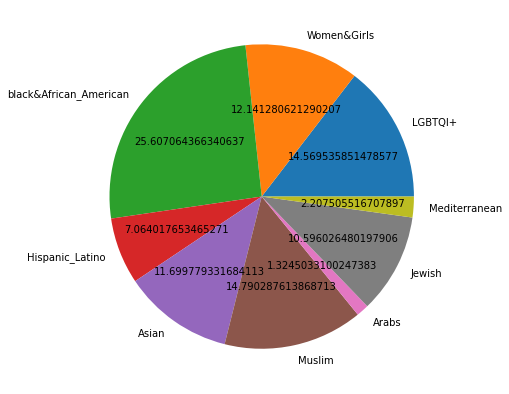

In [ ]:
create_pie_plt(targets_to_terms_counter.keys(), targets_to_terms_counter.values())

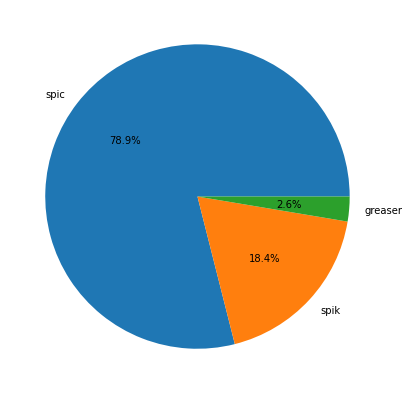

In [ ]:
create_pie_plt(hispanic_latino_words_counts.keys(), hispanic_latino_words_counts.values())

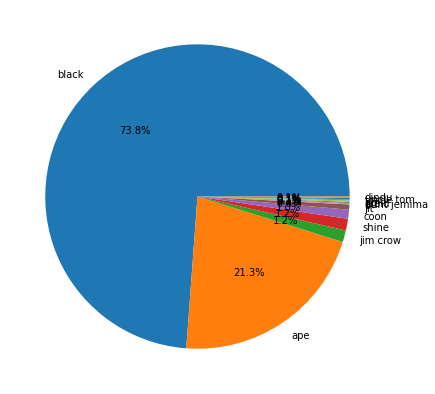

In [ ]:
create_pie_plt(black_african_words_counts.keys(), black_african_words_counts.values())

## ***Annotate dataset and save in Drive***

---



In [ ]:
ids_to_groups = {id: set() for id in df['id']}
for k,v in groups_comments_ids.items():
  for id in v:
    ids_to_groups[id].add(k)

In [ ]:
ids_to_groups = {k:v for k,v in ids_to_groups.items() if len(v)>1}
text_no_matches = {k:v for k,v in ids_to_groups.items() if not v}

In [ ]:
ids_to_groups = {id: set() for id in df['id']}
for k,v in groups_comments_ids.items():
  for id in v:
    ids_to_groups[id].add(k)

df['target'] = df['id'].apply(lambda x: ids_to_groups[x])
df.to_csv('/annotated.csv')  